# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn.datasets import load_wine

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [25]:
X,y= load_wine(return_X_y=True)
print(X.shape)

(178, 13)


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters=8
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, y_kmeans)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 8 The average silhouette_score is : 0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [35]:
n_clusters=5
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, y_kmeans)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [43]:
n_clusters=3
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, y_kmeans)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

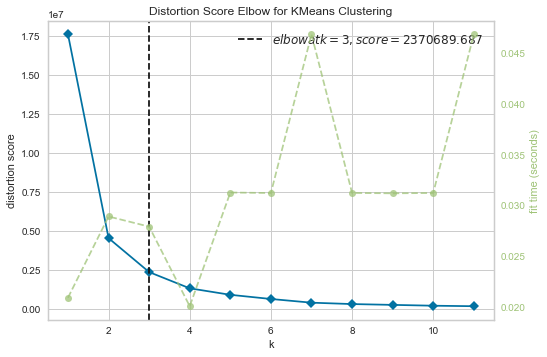

In [71]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, metric='distortion', k=(1,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

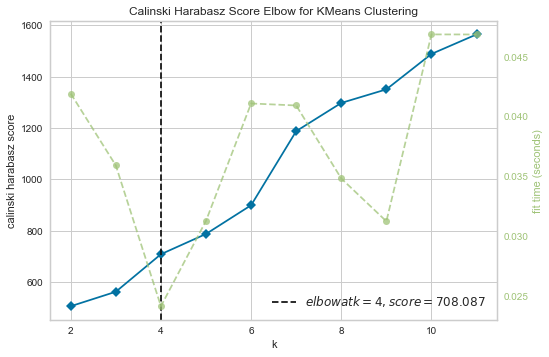

In [73]:
visualizer = KElbowVisualizer(kmeans, metric='calinski_harabasz', k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

C:\Users\Kalilu\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Kalilu\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Kalilu\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


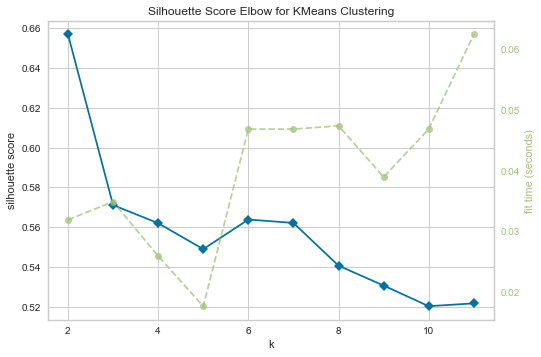

In [75]:
visualizer = KElbowVisualizer(kmeans, metric='silhouette', k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

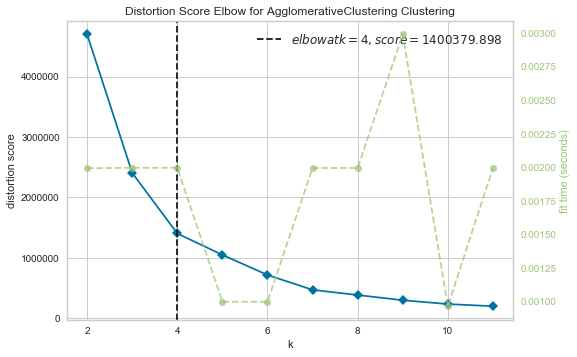

In [79]:
clustering = AgglomerativeClustering().fit(X)
visualizer = KElbowVisualizer(clustering, metric='distortion', k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

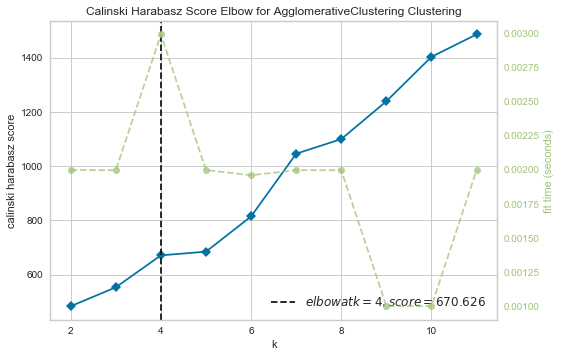

In [80]:
visualizer = KElbowVisualizer(clustering, metric='calinski_harabasz', k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

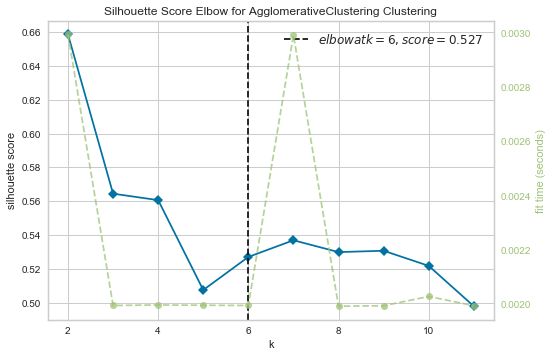

In [81]:
visualizer = KElbowVisualizer(clustering, metric='silhouette', k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [47]:
# AgglomerativeClustering qith 3 clusters performs better

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [107]:
n_clusters=3
clustering = AgglomerativeClustering(n_clusters= n_clusters).fit(X)
data_clusters3= pd.DataFrame(X, columns=load_wine().feature_names)
data_clusters3['y']=y
data_clusters3['labels']=y_clustering 

In [108]:
data_clusters3.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


In [109]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
# X['labels'] = clustering.labels_

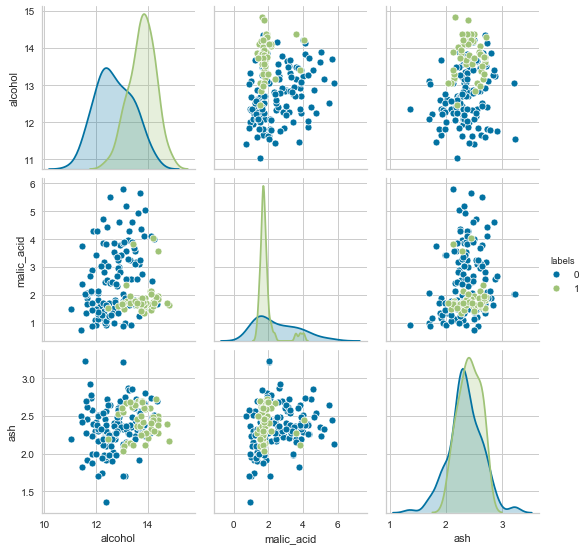

In [110]:
#Primer bin
sns.pairplot(data_clusters3[bin1], hue='labels')

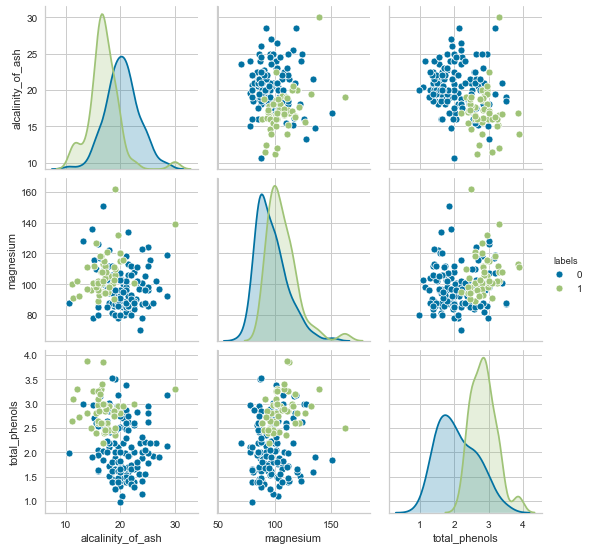

In [111]:
#Segundo bin
sns.pairplot(data_clusters3[bin2], hue='labels')

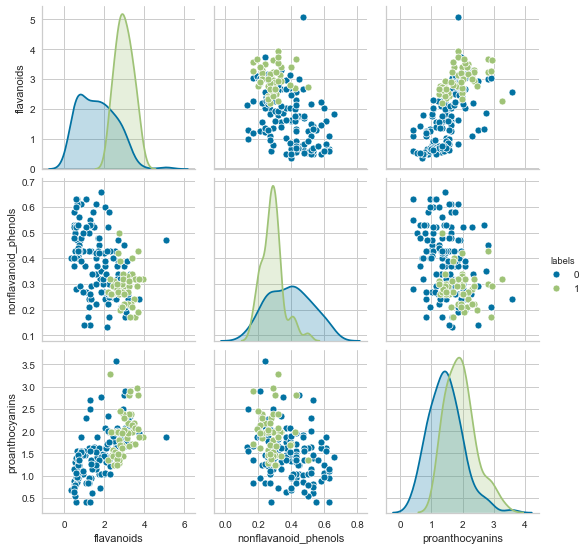

In [112]:
#Tercer bin
sns.pairplot(data_clusters3[bin3], hue='labels')

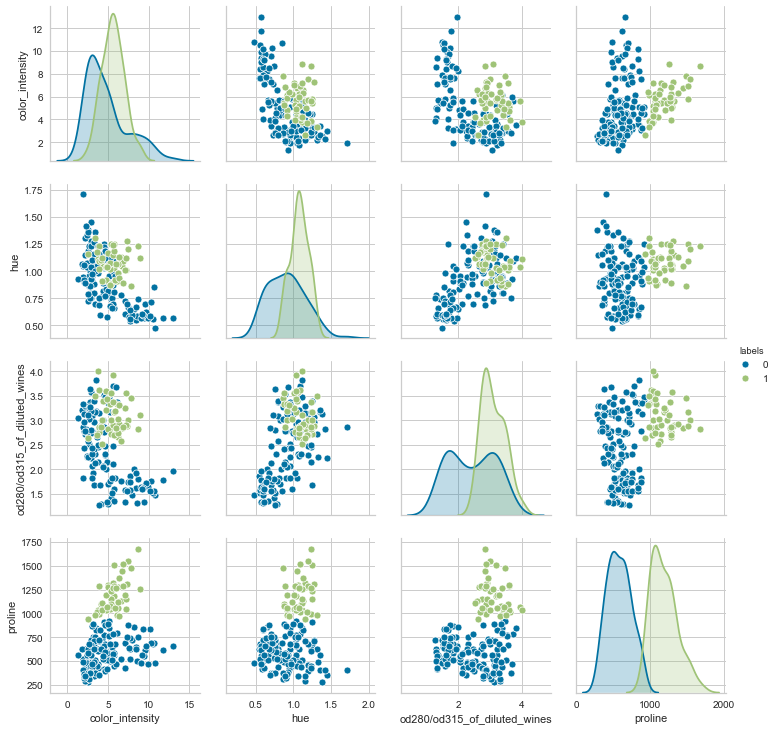

In [113]:
#Cuarto bin
sns.pairplot(data_clusters3[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

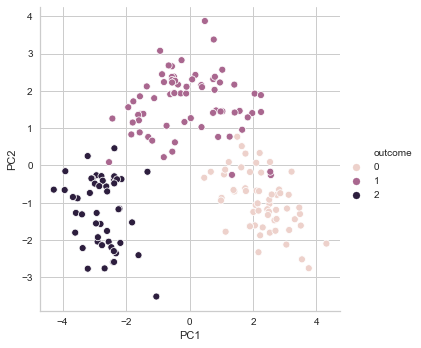

In [114]:
# PCA projection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
pc = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pca_df['outcome'] = y
sns.relplot(x='PC1', y='PC2', hue='outcome', data=pca_df )